<a href="https://colab.research.google.com/github/mtharruda/Moneyball/blob/main/Moneyball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How to win an unfair game?
Notebook para análise de dados da Major League Baseball (MLB) para simular as estratégias utilizadas pelo Athletic's Oakland's em 2001.

> How can you not be romantic about baseball?




#Preparando o ambiente

In [1]:
#BIBLIOTECAS

#Manipulação de dados
import pandas as pd
import numpy as np

#API para requisitar a base de dados
import kagglehub

#Regressão linear
from sklearn.linear_model import LinearRegression

#VizData
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Configuração do Pandas para exibir o máximo de colunas
pd.set_option('display.max_columns', None)

In [3]:
#Requisição do dataframe
path = kagglehub.dataset_download("wduckett/moneyball-mlb-stats-19622012")
print("Path to dataset files:", path)

100%|██████████| 19.2k/19.2k [00:00<00:00, 11.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/wduckett/moneyball-mlb-stats-19622012/versions/1


In [4]:
#Leitura do dataframe
bd = pd.read_csv(path + '/baseball.csv')
bd.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


#Seleção do ano
Para a análise vamos considerar seis anos anteriores aos dados reais utilizados pelo time.

In [5]:
bd_preMB = bd[(bd['Year'] >= 1995) & (bd['Year'] <= 2001)]
bd_preMB.reset_index(inplace=True)
bd_preMB.head()

,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412
1,331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404
2,332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384
3,333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439
4,334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393


#Análise ⚾

**Objetivo: chegar aos playoffs... *mas, como?***

In [6]:
#Diferenças entre times que chegaram aos playoffs e os que não chegaram
bd_preMB.groupby('Playoffs')['W'].describe()

,count,mean,std,min,25%,50%,75%,max
Playoffs,,,,,,,,
0,128.0,75.773438,8.125216,53.0,69.0,76.0,82.00,96.0
1,48.0,94.708333,6.417921,84.0,90.0,94.0,97.25,116.0


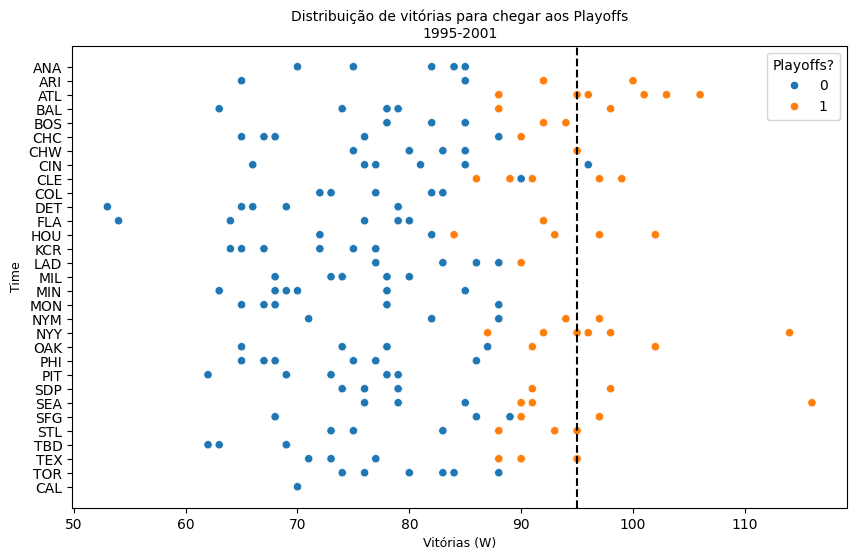

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.scatterplot(data=bd_preMB,
                y='Team',
                x='W',
                hue='Playoffs')
ax.axvline(x=95,
            color='black',
            linestyle='--'
            )

ax.set_title('Distribuição de vitórias para chegar aos Playoffs\n1995-2001', size=10)
ax.set_xlabel('Vitórias (W)', size=9)
ax.set_ylabel('Time', size=9)

ax.legend(loc='upper right',
          title='Playoffs?'
          )

plt.show()

#Runs Created (RC)

In [8]:
bd_preMB.loc[:, 'RC'] = (bd_preMB['OBP']*bd_preMB['SLG']*bd_preMB['BA'])/(bd_preMB['OBP']+bd_preMB['SLG'])
bd_preMB

/tmp/ipython-input-2641088021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd_preMB.loc[:, 'RC'] = (bd_preMB['OBP']*bd_preMB['SLG']*bd_preMB['BA'])/(bd_preMB['OBP']+bd_preMB['SLG'])


,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RC
0,330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,0.047221
1,331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,0.051396
2,332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,0.047156
3,333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,0.043008
4,334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,0.050456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,501,SEA,AL,1996,993,895,85,0.366,0.484,0.287,0,NaN,NaN,161,NaN,NaN,0.059812
172,502,SFG,NL,1996,752,862,68,0.331,0.388,0.253,0,NaN,NaN,162,NaN,NaN,0.045191
173,503,STL,NL,1996,759,706,88,0.330,0.407,0.267,1,6.0,3.0,162,NaN,NaN,0.048658
174,504,TEX,AL,1996,928,799,90,0.358,0.469,0.284,1,5.0,4.0,163,NaN,NaN,0.057659


#Win%

In [9]:
bd_preMB.loc[:, 'Win%'] = (pow(bd_preMB['RS'], 2)/(pow(bd_preMB['RS'], 2) + pow(bd_preMB['RA'], 2)))
bd_preMB

/tmp/ipython-input-2183812345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd_preMB.loc[:, 'Win%'] = (pow(bd_preMB['RS'], 2)/(pow(bd_preMB['RS'], 2) + pow(bd_preMB['RA'], 2)))


,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RC,Win%
0,330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,0.047221,0.472575
1,331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,0.051396,0.593483
2,332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,0.047156,0.562437
3,333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,0.043008,0.407147
4,334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,0.050456,0.517793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,501,SEA,AL,1996,993,895,85,0.366,0.484,0.287,0,NaN,NaN,161,NaN,NaN,0.059812,0.551767
172,502,SFG,NL,1996,752,862,68,0.331,0.388,0.253,0,NaN,NaN,162,NaN,NaN,0.045191,0.432161
173,503,STL,NL,1996,759,706,88,0.330,0.407,0.267,1,6.0,3.0,162,NaN,NaN,0.048658,0.536130
174,504,TEX,AL,1996,928,799,90,0.358,0.469,0.284,1,5.0,4.0,163,NaN,NaN,0.057659,0.574282


#Runs Differential (RD)

In [10]:
bd_preMB.loc[:, 'RD'] = bd_preMB['RS'] - bd_preMB['RA']
bd_preMB

/tmp/ipython-input-1783301610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd_preMB.loc[:, 'RD'] = bd_preMB['RS'] - bd_preMB['RA']


,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RC,Win%,RD
0,330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,0.047221,0.472575,-39
1,331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,0.051396,0.593483,141
2,332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,0.047156,0.562437,86
3,333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,0.043008,0.407147,-142
4,334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,0.050456,0.517793,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,501,SEA,AL,1996,993,895,85,0.366,0.484,0.287,0,NaN,NaN,161,NaN,NaN,0.059812,0.551767,98
172,502,SFG,NL,1996,752,862,68,0.331,0.388,0.253,0,NaN,NaN,162,NaN,NaN,0.045191,0.432161,-110
173,503,STL,NL,1996,759,706,88,0.330,0.407,0.267,1,6.0,3.0,162,NaN,NaN,0.048658,0.536130,53
174,504,TEX,AL,1996,928,799,90,0.358,0.469,0.284,1,5.0,4.0,163,NaN,NaN,0.057659,0.574282,129


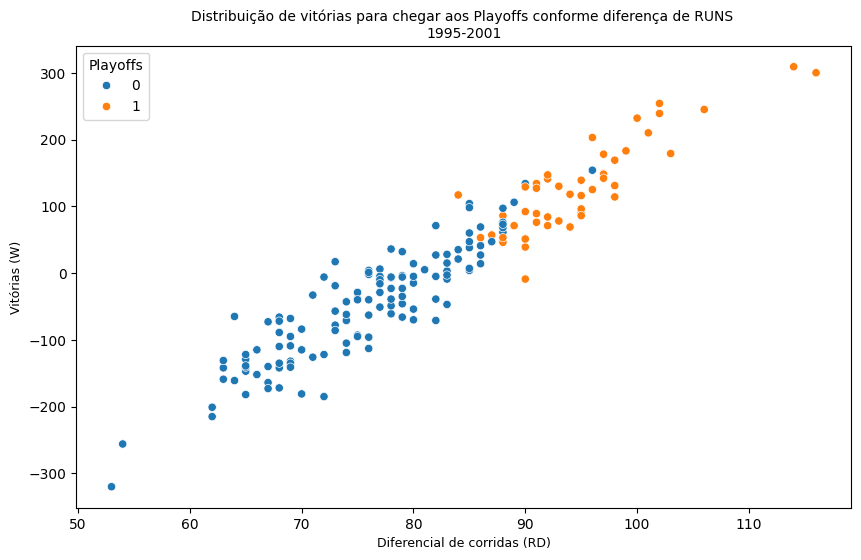

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.scatterplot(data=bd_preMB,
                y='RD',
                x='W',
                hue='Playoffs')

ax.set_title('Distribuição de vitórias para chegar aos Playoffs conforme diferença de RUNS \n1995-2001', size=10)
ax.set_xlabel('Diferencial de corridas (RD)', size=9)
ax.set_ylabel('Vitórias (W)', size=9)

plt.show()

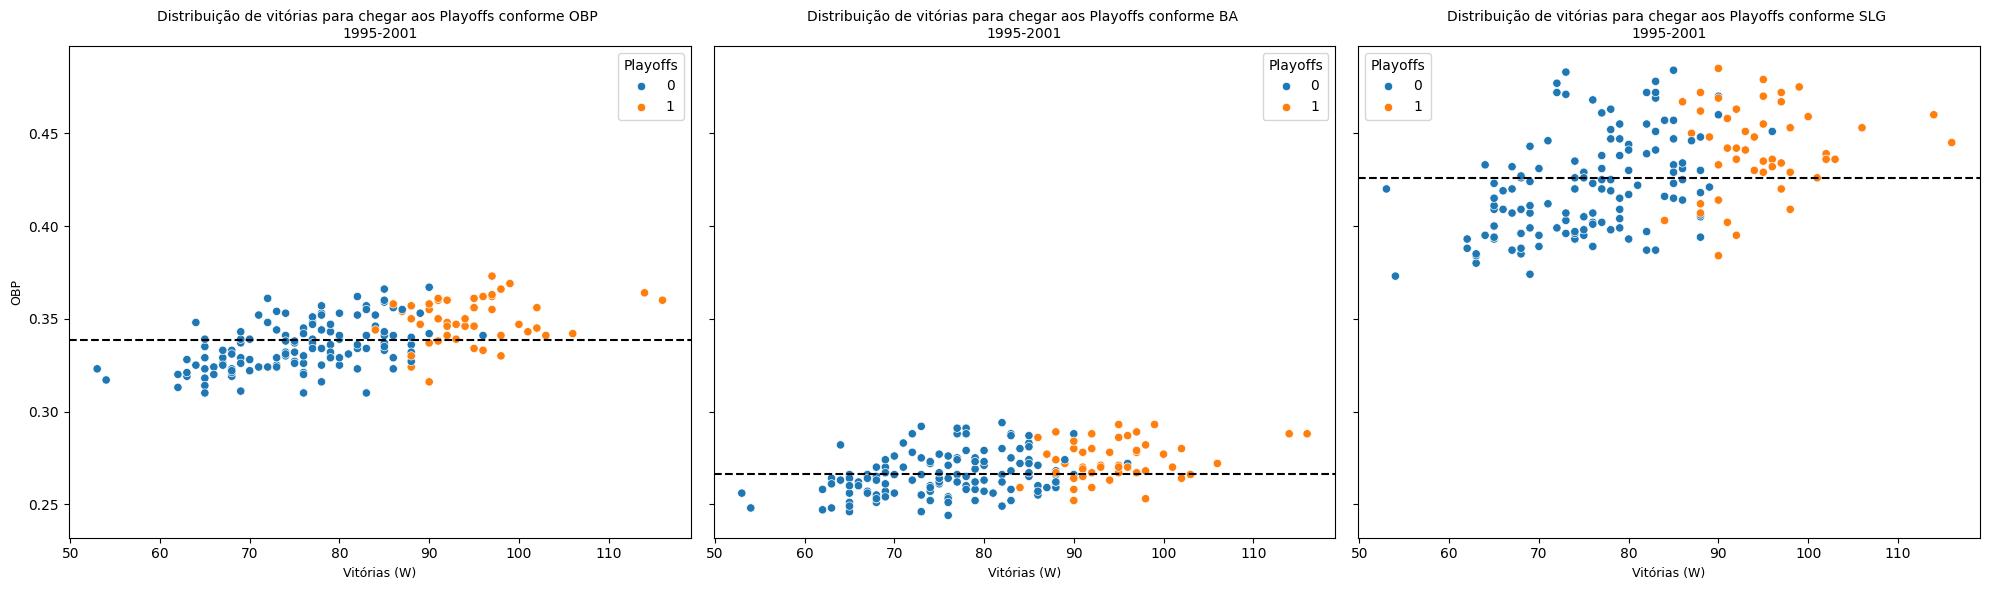

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Add the first scatter plot to axes[0]
sns.scatterplot(data=bd_preMB,
                y='OBP',
                x='W',
                hue='Playoffs',
                ax=axes[0])

axes[0].set_title('Distribuição de vitórias para chegar aos Playoffs conforme OBP \n1995-2001', size=10)
axes[0].set_ylabel('OBP', size=9)
axes[0].set_xlabel('Vitórias (W)', size=9)

axes[0].axhline(y=bd_preMB['OBP'].median(),
            color='black',
            linestyle='--'
            )

# Add the second scatter plot to axes[1]
sns.scatterplot(data=bd_preMB,
                y='BA',
                x='W',
                hue='Playoffs',
                ax=axes[1])

axes[1].set_title('Distribuição de vitórias para chegar aos Playoffs conforme BA \n1995-2001', size=10)
axes[1].set_ylabel('BA', size=9)
axes[1].set_xlabel('Vitórias (W)', size=9)

axes[1].axhline(y=bd_preMB['BA'].median(),
            color='black',
            linestyle='--'
            )


# Add the second scatter plot to axes[1]
sns.scatterplot(data=bd_preMB,
                y='SLG',
                x='W',
                hue='Playoffs',
                ax=axes[2])

axes[2].set_title('Distribuição de vitórias para chegar aos Playoffs conforme SLG \n1995-2001', size=10)
axes[2].set_ylabel('SLG', size=9)
axes[2].set_xlabel('Vitórias (W)', size=9)

axes[2].axhline(y=bd_preMB['SLG'].median(),
            color='black',
            linestyle='--'
            )


plt.tight_layout()
plt.show()

#Regressão linear

In [13]:
X = bd_preMB[['OBP']]
y = bd_preMB['W']

# Mostrando o formato das variáveis
print("\nFormato de y (Vitorias):", y.shape)
print("Formato de X (OBP):", X.shape)


Formato de y (Vitorias): (176,)
Formato de X (OBP): (176, 1)


In [14]:
# 1. Criar uma instância do modelo
model = LinearRegression()

# 2. Treinar o modelo com nossos dados (X e y)
# O método .fit() encontra os melhores valores para β₀ e β₁
model.fit(X, y)

print("\nModelo treinado com sucesso!")


Modelo treinado com sucesso!


In [15]:
# Extraindo o intercepto (β₀)
beta_0 = model.intercept_

# Extraindo o coeficiente para OBP (β₁)
# modelo.coef_ retorna um array, então pegamos o primeiro elemento
beta_1 = model.coef_[0]

print(f"\n--- Resultados da Regressão ---")
print(f"Intercepto (β₀): {beta_0:.2f}")
print(f"Coeficiente para OBP (β₁): {beta_1:.2f}")

print(f"\nEquação final: Vitórias = {beta_0:.2f} + {beta_1:.2f} × OBP")


--- Resultados da Regressão ---
Intercepto (β₀): -79.38
Coeficiente para OBP (β₁): 473.11

Equação final: Vitórias = -79.38 + 473.11 × OBP


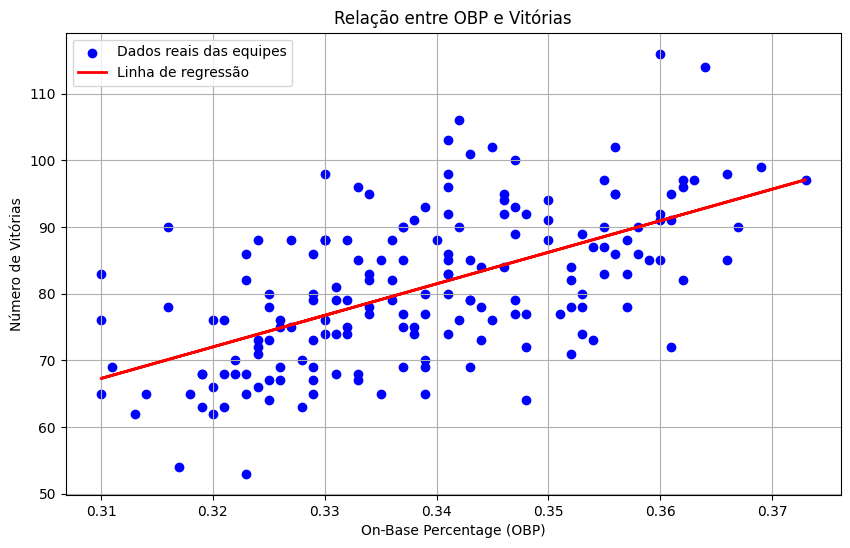

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar os dados originais (dispersão)
ax = plt.scatter(X, y, color='blue', label='Dados reais das equipes')

# Plotar a linha de regressão
# Usamos o modelo treinado para prever os valores de y para cada x
ax = plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linha de regressão')

# Configurações do gráfico
plt.title('Relação entre OBP e Vitórias')
plt.xlabel('On-Base Percentage (OBP)')
plt.ylabel('Número de Vitórias')
plt.legend()

plt.grid(True)

plt.show()

In [17]:
# Example: predict wins for an OBP of 0.33
predicted_wins = model.predict(np.array([[0.37]]))
print(f"Predicted wins for OBP of 0.33: {predicted_wins[0]:.2f}")

Predicted wins for OBP of 0.33: 95.67


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
X = bd_preMB[['OBP']]
Z = bd_preMB[['SLG']]
y = bd_preMB['W']

# Mostrando o formato das variáveis
print("\nFormato de y (Vitorias):", y.shape)
print("Formato de X (OBP):", X.shape)
print("Formato de Z (SLG):", Z.shape)


Formato de y (Vitorias): (176,)
Formato de X (OBP): (176, 1)
Formato de Z (SLG): (176, 1)


In [19]:
# Combine OBP and SLG into a single feature matrix
X_combined = pd.concat([X, Z], axis=1)

# 1. Criar uma instância do modelo
model = LinearRegression()

# 2. Treinar o modelo com nossos dados (X_combined e y)
# O método .fit() encontra os melhores valores para β₀, β₁ e β₂
model.fit(X_combined, y)

print("\nModelo treinado com sucesso!")


Modelo treinado com sucesso!


In [20]:
# Extraindo o intercepto (β₀)
beta_0 = model.intercept_

# Extraindo os coeficientes para OBP (β₁) e SLG (β₂)
beta_1 = model.coef_[0]
beta_2 = model.coef_[1]

print(f"\n--- Resultados da Regressão ---")
print(f"Intercepto (β₀): {beta_0:.2f}")
print(f"Coeficiente para OBP (β₁): {beta_1:.2f}")
print(f"Coeficiente para SLG (β₂): {beta_2:.2f}")

print(f"\nEquação final: Vitórias = {beta_0:.2f} + {beta_1:.2f} × OBP + {beta_2:.2f} × SLG")


--- Resultados da Regressão ---
Intercepto (β₀): -76.79
Coeficiente para OBP (β₁): 425.87
Coeficiente para SLG (β₂): 31.41

Equação final: Vitórias = -76.79 + 425.87 × OBP + 31.41 × SLG


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


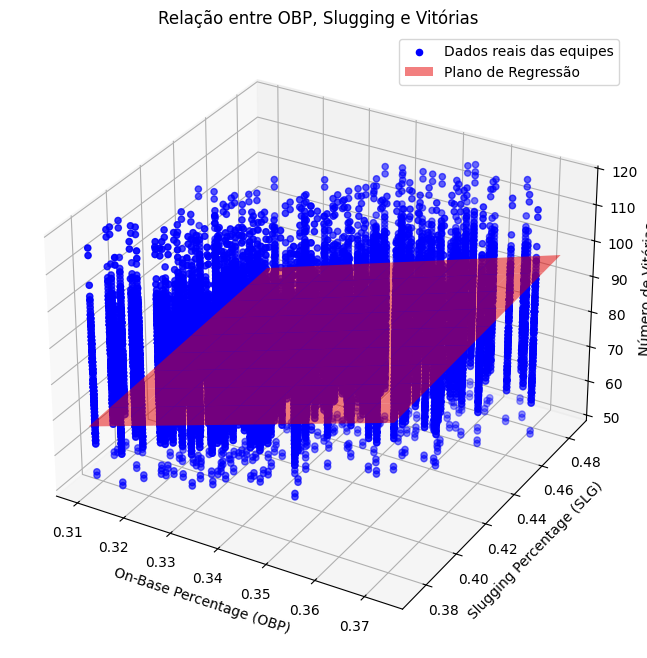

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Criando a figura e os eixos 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os dados de dispersão originais
ax.scatter(X, Z, y, c='blue', marker='o', label='Dados reais das equipes')

# Criando uma grade para plotar o plano de regressão
x_surf = np.linspace(X.min(), X.max(), 10)
z_surf = np.linspace(Z.min(), Z.max(), 10)
x_surf, z_surf = np.meshgrid(x_surf, z_surf)
y_surf = model.predict(np.c_[x_surf.ravel(), z_surf.ravel()]).reshape(x_surf.shape)

# Plotando o plano de regressão
ax.plot_surface(x_surf, z_surf, y_surf, color='red', alpha=0.5, label='Plano de Regressão')

# Configurações do gráfico
ax.set_title('Relação entre OBP, Slugging e Vitórias')
ax.set_xlabel('On-Base Percentage (OBP)')
ax.set_ylabel('Slugging Percentage (SLG)') # Assumindo que Z representa SLG
ax.set_zlabel('Número de Vitórias')
ax.legend()

plt.show()